In [2]:
import duckdb
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from lib import search_df

In [12]:
embeddings_file = 'outputs/mxbai_embeddings.parquet'
embeddings_df = duckdb.execute(f"select * from read_parquet('{embeddings_file}') ").fetch_df()
responses_df = pd.read_csv("data/reflections.csv")
df = pd.merge(left=embeddings_df, right=responses_df, left_on="student_id", right_on="perm")

# filter (optional)
df = df[df.question_id == "r3"]

In [13]:
# this will take some time
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(np.array(df.embedding.to_list()))

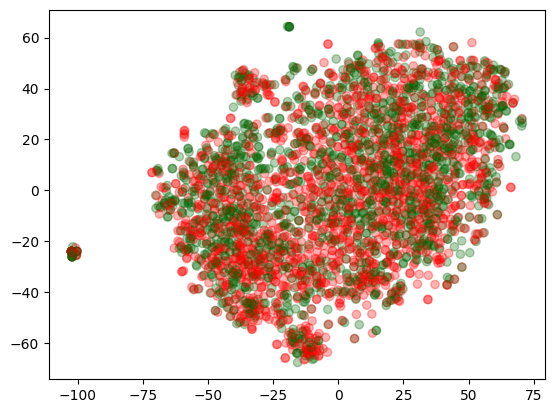

In [14]:
questions = ['r1','r2','r3','r4']

colors = ["red", "darkorange", "turquoise", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.first_gen_coll_student
colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)